Epoch 1/10
94/94 - 2s - loss: 0.0625 - 2s/epoch - 24ms/step
Epoch 2/10
94/94 - 0s - loss: 0.0347 - 251ms/epoch - 3ms/step
Epoch 3/10
94/94 - 0s - loss: 0.0245 - 246ms/epoch - 3ms/step
Epoch 4/10
94/94 - 0s - loss: 0.0213 - 241ms/epoch - 3ms/step
Epoch 5/10
94/94 - 0s - loss: 0.0200 - 258ms/epoch - 3ms/step
Epoch 6/10
94/94 - 0s - loss: 0.0190 - 244ms/epoch - 3ms/step
Epoch 7/10
94/94 - 0s - loss: 0.0181 - 252ms/epoch - 3ms/step
Epoch 8/10
94/94 - 0s - loss: 0.0172 - 255ms/epoch - 3ms/step
Epoch 9/10
94/94 - 0s - loss: 0.0164 - 290ms/epoch - 3ms/step
Epoch 10/10
94/94 - 0s - loss: 0.0153 - 248ms/epoch - 3ms/step
2/2 [==============================] - 0s 4ms/step
Train Score: 62.67 RMSE
Test Score: 185.67 RMSE


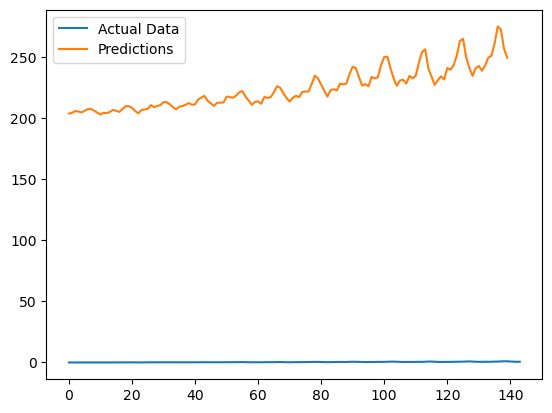

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


# Load the dataset
dataset = read_csv('airline-passengers.csv', usecols=[1], engine='python').values.astype('float32')

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split into train and test sets
train_size = int(len(dataset) * 0.67)
train, test = dataset[:train_size,:], dataset[train_size:len(dataset),:]

# Reshape input to be [samples, time steps, features]
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX, testX = np.reshape(trainX, (-1, 1, 1)), np.reshape(testX, (-1, 1, 1))

# Create and fit the LSTM network
model = Sequential([LSTM(4, input_shape=(1, look_back)), Dense(1)])
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# Make predictions
trainPredict, testPredict = model.predict(trainX), model.predict(testX)

# Invert predictions
trainPredict, testPredict = scaler.inverse_transform(trainPredict), scaler.inverse_transform(testPredict)
trainY, testY = scaler.inverse_transform([trainY]), scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Train Score: %.2f RMSE' % trainScore)
print('Test Score: %.2f RMSE' % testScore)

# Visualize the results
plt.plot(dataset, label='Actual Data')
plt.plot(np.concatenate([trainPredict, testPredict]), label='Predictions')
plt.legend()
plt.show()
